# DBSCAN

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) DBSCAN
- 2) Aplicação - clusterização de estações

## 1) DBSCAN

O DBSCAN é um algoritmo de clusterização baseado no conceito de **densidade**.

O nome do algoritmo é uma sigla, que explica bem seu funcionamento: **D**ensity-**B**ased **S**patial **C**lustering of **A**pplications with **N**oise.

O algoritmo foi proposto com o objetivo de proporcionar uma técnica de clusterização que possa funcionar **mesmo quando os clusters a serem criados não forem uniformes**, tendo **tamanho, forma e densidade variáveis**. 

Além disso, por construção o método funciona bem em contextos em que há **ruídos/outliers**, sendo capaz de detectá-los sem influenciar a criação dos clusters. 

Por fim, uma vantagem enorme é o fato do algoritmo **não demandar a determinação prévia da quantidade de clusters**, o que é uma vantagem interessante se não houver indicações do problema de negócio para esta determinação (embora, como veremos, ainda há hiperparâmetros importantes a serem determinados).

Vamos entender o funcionamento do algoritmo mais a fundo!

O DBSCAN tem como princípio fundamental a **determinação de regiões de alta densidade de observações**, que são **separadas entre si por regiões de baixa densidade**.

Lembrando que, por ser um algoritmo não-supervisionado de clusterização, quando nos referimos à "regiões" cuja densidade será aferida, estamos nos referindo a regiões **do espaço de features**.

Uma pergunta natural é: **como determinar a densidade de uma região?** Para responder esta pergunta, precisamos de algumas definições:

> **Densidade em um ponto $P$:** número de pontos dentro de um círculo de raio $\epsilon$ centrado no ponto $P$ (região chamada de vizinhança-$\epsilon$ de $P$);

> **Região densa**: dizemos que uma região é densa se o círculo de raio $\epsilon$ contém pelo menos um número mínimo de pontos (que chamaremos de $\text{minPts}$. Uma região densa **formará um cluster**.

Para visualizar as definições acima, considere a figura a seguir:

<img src=https://www.researchgate.net/publication/315326812/figure/fig2/AS:473095908663297@1489806262333/A-cluster-consists-of-core-points-red-and-border-points-green-Core-points-have-at.png width=500>

<img src=https://www.researchgate.net/publication/335485895/figure/fig2/AS:797412515909651@1567129367940/A-single-DBSCAN-cluster-with-Core-Border-and-Noise-Points.ppm width=500>

Dada a definição acima, podemos classificar pontos dentro de um cluster como:

> **Core points (pontoa centrais)**: são pontos que estão no interior dos clusters (regiões densas). Matematicamente, um ponto é considerado core **se sua densidade é de pelo menos $\text{minPts}$**, ou seja, se **há pelo menos $\text{minPts}$ pontos dentro do círculo de raio $\epsilon$ centrado no ponto**.

> **Border points (pontos de fronteira)**: são pontos que estão na fronteira de um cluster. Matematicamente, estes pontos **têm densidade menor que $\text{minPts}$**, mas que **fazem parte da vizinhança-$\epsilon$ de um ponto central**.

> **Noisy points (pontos de ruído/outliers)**: são pontos que não são centrais nem de fronteira. Estes pontos não fazem parte do cluster, e são considerados outliers.


Olhando para as definições acima, e pras figuras, fica claro que $\epsilon$ e $\text{minPts}$ são os hiperparâmetros do modelo -- e que os clusters gerados são fortemente dependentes destes hiperparâmetros!


> - $\epsilon$ (`eps` no sklearn): determina o quão próximos (relativo a uma dada **métrica de distância**) os pontos devem estar entre si para serem considerados vizinhos, e, eventualmente, parte de um cluster. Na prática, **se a distância entre dois pontos for menor ou igual a $\epsilon$, os pontos serão considerados vizinhos**;
<br><br>
>Se o valor de `eps` for muito pequeno, grande parte dos dados não serão clusterizados - muitos pontos serão considerados outliers, pois não haverá vizinhos suficientes para gerar uma região densa;<br><br>
>Por outro lado, se o valor de `eps` for muito grande, os clusters se fundirão, e a maioria dos pontos estarão em um único, grande cluster.<br><br>
>Portanto, a escolha de `eps` está muito relacionada com **a escala** das features, o que demanda cuidadosa análise exploratória.<br><br>
>Além disso, note que o  `eps` depende também fortemente da **métrica de distância** (`metric` no sklearn) a ser utilizada.


> - $\text{minPts}$ (`min_samples` no sklearn): o número mínimo de pontos que devem ser vizinhos para formar uma região densa, que será um cluster.
<br><br>
Valores maiores de `min_samples` são preferíveis para datasets com outliers, formando clusters mais significativos (isto é, um cluster só será formado se realmente tiver uma alta densidade).

Para algumas dicas práticas de como estimar bons valores para os hiper-parâmetros, [clique aqui](https://en.wikipedia.org/wiki/DBSCAN#Parameter_estimation).



__________

Agora que entendemos os princípios e principais hiperparâmetros do DBSCAN, vamos agora entender os passos do algoritmo (que é bem simples!)

> **Passo 1**: o algoritmo escolhe aleatoriamente um dos pontos, e sua vizinhança-$\epsilon$ é calculada;

> **Passo 2**: se este ponto tem $\text{minPts}$ em sua vizinhança-$\epsilon$, a formação do cluster é iniciada (veja próximo passo). Se não, o ponto é marcado como outlier (mas pode ser considerado como border point de um outro cluster posteriormente). Se for um outlier, volte ao passo 1;

> **Passo 3**: se o ponto for um core point, todos os pontos na vizinhança são agregados ao cluster, e o passo 1 é aplicado a cada um deles;

> **Passo 4**: o processo do passo 3 é continuado até que todos os pontos tenham um cluster associado, ou seja marcado como noise.

Podemos visualizar a seguir o DBSCAN em funcionamento:


<img src="http://data-analysis-stats.jp/wp-content/uploads/2019/09/DBSCAN_01.gif" width=400>


<img src=https://i.pinimg.com/originals/bb/3d/5e/bb3d5e522cbcb2dd07a81f8118de2041.gif width=500>


A classe do sklearn é esta: [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)


Vamos agora ver o DBSCAN em ação, com o mesmo dataset artificial da aula passada!

____


<a href="https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/">DBSCAN Interactive Graph</a>
  
    
![](https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/DBSCAN-density-data.svg/353px-DBSCAN-density-data.svg.png)



DBSCAN apresenta algumas grandes vantagens sobre outros algoritmos de agrupamento:
- Em primeiro lugar, ele não requer um número pré-selecionado de clusters.
- Ele também identifica outliers como ruídos, ao contrário do deslocamento da média, que simplesmente os joga em um cluster, mesmo se o ponto de dados for muito diferente.
- Além disso, ele pode encontrar clusters de tamanhos e formatos arbitrários muito bem.

A principal desvantagem do DBSCAN é que ele não funciona tão bem quanto os outros quando os clusters são de **densidade variável**. Isso ocorre porque a configuração do limite de distância ε e minPoints para identificar os pontos de vizinhança irá variar de cluster para cluster quando a densidade varia. Esta desvantagem também ocorre com dados dimensionais muito elevados, uma vez que novamente o limite de distância ε torna-se difícil de estimar.

In [24]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler

from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
X, _ = make_blobs(n_samples=300, n_features=2, centers=4, cluster_std=0.6, random_state=0)
X

array([[ 8.36856841e-01,  2.13635938e+00],
       [-1.41365810e+00,  7.40962324e+00],
       [ 1.15521298e+00,  5.09961887e+00],
       [-1.01861632e+00,  7.81491465e+00],
       [ 1.27135141e+00,  1.89254207e+00],
       [ 3.43761754e+00,  2.61654166e-01],
       [-1.80822253e+00,  1.59701749e+00],
       [ 1.41372442e+00,  4.38117707e+00],
       [-2.04932168e-01,  8.43209665e+00],
       [-7.11099611e-01,  8.66043846e+00],
       [-1.71237268e+00,  2.77780226e+00],
       [-2.67000792e+00,  8.35389140e+00],
       [ 1.24258802e+00,  4.50399192e+00],
       [-2.22783649e+00,  6.89479938e+00],
       [ 1.45513831e+00, -2.91989981e-02],
       [ 4.53791789e-01,  3.95647753e+00],
       [ 1.06923853e+00,  4.53068484e+00],
       [ 2.56936589e+00,  5.07048304e-01],
       [-1.06690610e+00,  3.13165795e+00],
       [-1.07859101e+00,  2.20451529e+00],
       [ 2.71506328e+00,  1.29082190e+00],
       [ 1.77710994e+00,  1.18655254e+00],
       [ 7.34363910e-01,  5.03725437e+00],
       [-1.

In [3]:
colunas = [f'X{i}' for i in range(X.shape[1])]
colunas

['X0', 'X1']

In [4]:
X = StandardScaler().fit_transform(X)
X_df = pd.DataFrame(data=X, columns=colunas)

X_df.head()

,X0,X1
0,0.516255,-0.707227
1,-0.861664,1.329068
2,0.711174,0.437049
3,-0.619792,1.485573
4,0.782282,-0.801378


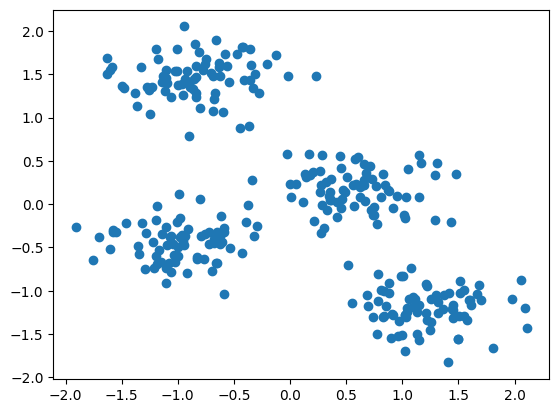

In [5]:
plt.scatter(X_df['X0'], X_df['X1'])

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

In [6]:
from sklearn.cluster import DBSCAN

In [7]:
modelo = DBSCAN().fit(X_df)

In [8]:
modelo.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [9]:
modelo.get_params()

{'algorithm': 'auto',
 'eps': 0.5,
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'min_samples': 5,
 'n_jobs': None,
 'p': None}

Como podemos melhorar?

In [10]:
modelo = DBSCAN(eps=0.1).fit(X_df)
modelo.labels_

array([-1,  0, -1,  8, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  7,  2,
        5,  3, -1, -1,  4, -1, -1,  1, -1,  4, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  4, -1,  1, -1, -1,  1,  3,  8,  1,  0, -1, -1,
        5, -1,  4, -1,  3, -1, -1,  6, -1, -1,  7, -1,  3, -1,  3, -1,  5,
       -1,  1, -1, -1,  8,  1, -1, -1,  1,  2,  5,  8, -1,  7, -1,  4, -1,
       -1,  5,  9, -1,  0, -1,  4, -1,  1,  3, -1, -1, -1, -1, -1, -1, -1,
       -1,  5,  2,  5, -1, -1, -1, -1, -1, -1,  4, -1,  4, -1,  0, -1, -1,
       -1, -1,  4, -1,  4, -1,  5,  4, -1, -1,  1, -1,  1,  1, -1,  0, -1,
       -1, -1, -1, -1, -1,  3, -1, -1, -1,  1,  0, -1, -1,  6,  0,  2, -1,
        9, -1,  3,  8,  1,  4,  2, -1,  7,  7, -1, -1, -1, -1,  9, -1, -1,
       -1, -1,  4, -1, -1,  8, -1, -1,  7,  3, -1, -1, -1,  1, -1, -1, -1,
       -1, -1, -1, -1,  3,  2,  7, -1, -1, -1, -1,  1,  6, -1,  3, -1,  1,
       -1, -1,  1, -1,  2, -1, -1,  1, -1, -1,  0, -1,  3, -1, -1,  7,  6,
        5, -1, -1, -1, -1

Empiricamente

In [11]:
modelo = DBSCAN(eps=0.4).fit(X_df)
modelo.labels_

array([2, 0, 1, 0, 2, 2, 1, 1, 0, 0, 1, 0, 1, 0, 2, 1, 1, 2, 1, 1, 2, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 2, 1, 2, 0, 2, 2, 1, 0, 1, 0, 2, 0, 1, 0, 1, 1, 1,
       0, 2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 2, 0, 2, 1, 2, 2, 0, 1, 2, 1,
       0, 0, 1, 2, 0, 1, 1, 1, 2, 2, 1, 1, 0, 2, 0, 2, 1, 2, 2, 1, 0, 1,
       1, 1, 2, 0, 2, 1, 0, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 0, 1,
       1, 2, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       2, 1, 0, 1, 2, 1, 0, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 1, 1, 0,
       2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 2, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 2, 2, 1,
       0, 2, 2, 1, 2, 1, 1, 0, 0, 1, 1, 0, 1, 2, 1, 1, 2, 1, 0, 1, 2, 1,
       2, 0, 0, 0, 0, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 2, 2, 0, 1, 1, 1, 2,
       0, 1, 1, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 0, 0, 2, 2, 1, 2, 2, 2,
       0, 1, 0, 1, 2, 2, 0, 0, 0, 2, 2, 1, 0, 1])

Utilizando os vizinhos

In [12]:
from sklearn.neighbors import NearestNeighbors

In [13]:
vizinho_proximo = NearestNeighbors(n_neighbors=2)
vizinhos = vizinho_proximo.fit(X_df)
vizinhos

NearestNeighbors(n_neighbors=2)

In [14]:
distancias, indices = vizinho_proximo.kneighbors(X_df)

In [15]:
distancias.mean().round(2)

0.04

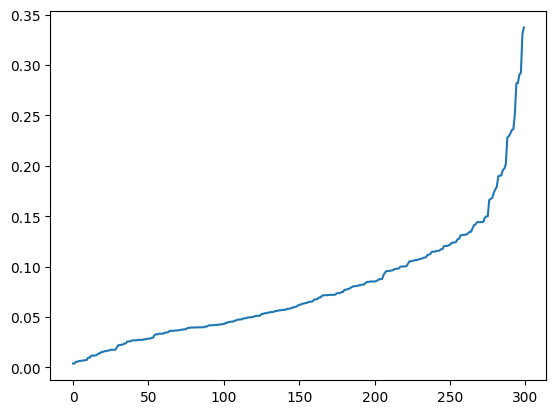

In [16]:
plt.plot(np.sort(distancias[:,1]))

In [17]:
# Método do joelho

In [18]:
modelo = DBSCAN(eps=0.15).fit(X_df)
modelo.labels_

array([-1,  0,  1,  0,  3, -1,  2,  1, -1,  4,  2, -1,  1, -1, -1,  1,  1,
        3,  2,  6,  3,  3,  1,  2,  2, -1,  3,  1, -1, -1,  5,  0, -1, -1,
        0,  0,  0, -1, -1,  3,  1,  2, -1,  1,  2,  2,  0,  2,  0,  3,  2,
        3,  0,  3, -1,  2, -1, -1,  0,  3,  0,  1, -1,  2,  2,  2,  0,  3,
       -1,  2,  1, -1,  0,  2,  2,  4,  2,  1,  3,  0, -1,  1,  3,  3,  0,
        1,  3,  1, -1,  0,  1,  3, -1,  2,  2,  1,  3,  3, -1, -1,  4, -1,
        5,  3,  1,  3, -1,  1,  0,  1,  6, -1,  3, -1,  3, -1,  0,  3,  3,
       -1, -1,  3,  2,  3,  3,  3,  3,  6,  3,  2, -1,  2,  2, -1,  0,  6,
        7,  0, -1,  5, -1,  2,  1, -1, -1,  2,  0, -1, -1,  0,  0,  1, -1,
        1, -1,  2,  0,  2,  3,  1,  0,  1,  1, -1,  1, -1, -1,  1,  3,  1,
        1,  0,  3, -1, -1,  0,  3,  3,  1,  2,  3,  1,  2,  2,  1,  1,  1,
        1,  3,  0, -1,  2,  1,  1,  2,  6,  7, -1,  2,  0,  1,  2, -1,  2,
        1, -1,  2,  4,  1, -1,  1,  2, -1, -1,  0,  2,  2,  3, -1,  1,  0,
        3,  3,  7, -1,  7

https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html

In [21]:
from sklearn import metrics

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

Estimated number of clusters: 4
Estimated number of noise points: 22
Silhouette Coefficient: 0.594


<AxesSubplot: ylabel='Count'>

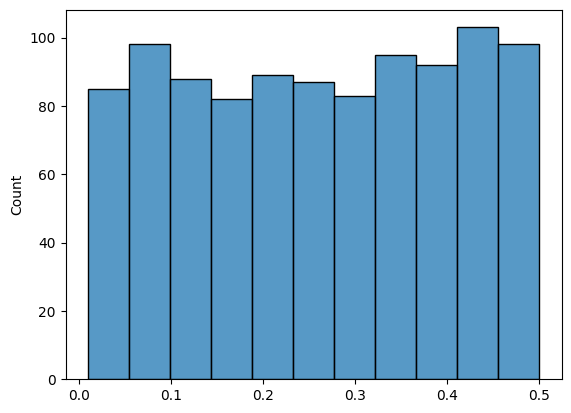

In [29]:
sns.histplot(np.random.uniform(0.01, 0.5, 1000))

In [34]:
def dbscan_hype_tunning(X, eps_range=(0.01, 0.5), min_samples_range=(2, 5)):
    list_eps = []
    list_min_samples = []
    list_n_clusters = []
    list_n_noise = []
    list_silhouette_score = []
        
    for eps in np.random.uniform(eps_range[0], eps_range[1], 100):
        for min_samples in range(min_samples_range[0], min_samples_range[1]):
            db = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=31).fit(X)
            core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
            core_samples_mask[db.core_sample_indices_] = True
            labels = db.labels_

            if(len(set(labels)) <= 1):
                continue
            
            n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
            n_noise_ = list(labels).count(-1)

            list_eps.append(eps)
            list_min_samples.append(min_samples)
            list_n_clusters.append(n_clusters_)
            list_n_noise.append(n_noise_)
            list_silhouette_score.append(metrics.silhouette_score(X, labels))
            
    df = pd.DataFrame({
        'eps': list_eps,
        'min_samples': list_min_samples,
        'n_clusters': list_n_clusters,
        'n_noise': list_n_noise,
        'silhouette_score': list_silhouette_score
    })
    return df

In [48]:
df_result = dbscan_hype_tunning(X_df)

In [49]:
df_result.sort_values(['silhouette_score', 'min_samples', 'n_noise'], 
                      ascending=[False, True, True])

,eps,min_samples,n_clusters,n_noise,silhouette_score
17,0.383521,4,4,0,0.656923
29,0.344659,4,4,0,0.656923
68,0.365494,4,4,0,0.656923
71,0.355011,4,4,0,0.656923
77,0.370835,4,4,0,0.656923
...,...,...,...,...,...
80,0.066973,4,9,249,-0.533730
179,0.066712,4,9,249,-0.533730
117,0.030188,2,25,246,-0.548137
145,0.029773,2,25,246,-0.548137


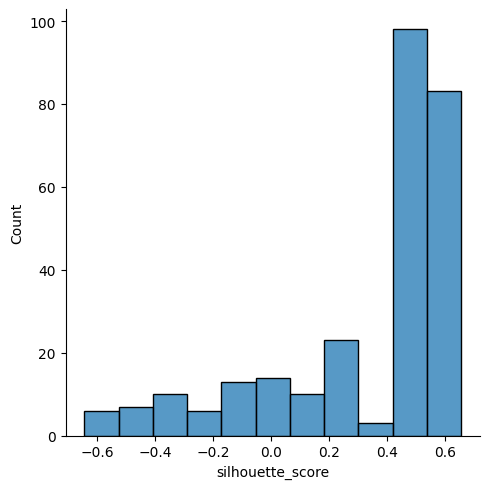

In [50]:
sns.displot(df_result['silhouette_score'])

In [52]:
db = DBSCAN(eps=0.383521, min_samples=4, n_jobs=31).fit(X_df)

In [53]:
X_df_cluster = X_df.copy()
X_df_cluster['label'] = db.labels_
X_df_cluster.head()

,X0,X1,label
0,0.516255,-0.707227,2
1,-0.861664,1.329068,0
2,0.711174,0.437049,1
3,-0.619792,1.485573,0
4,0.782282,-0.801378,2


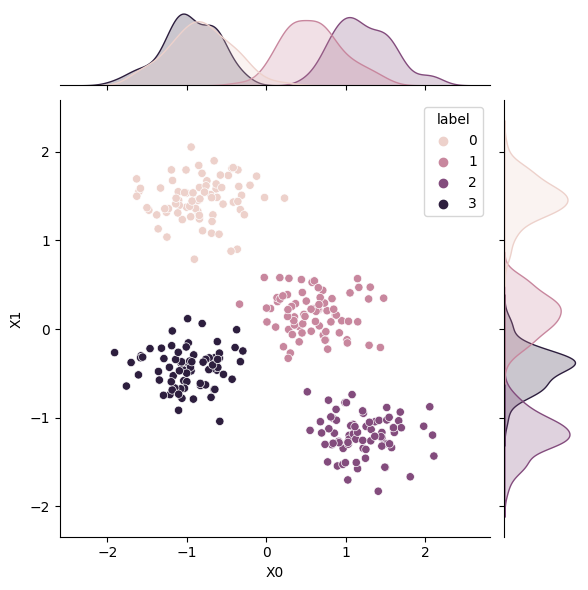

In [54]:
sns.jointplot(data=X_df_cluster, x='X0', y='X1', hue='label')

Quem são os outliers??

In [19]:
# os que tem o label -1

____
____
_____

## 2) Aplicação - clusterização de estações

Vamos pegar os dados geográficos das estações da malha de transporte metropolitano de SP, e ver uma aplicação interessante do DBSCAN

<img src="https://i.redd.it/6jxo08iuzpxy.gif" width=500>

Vamos usar a [distância de Haversine](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.haversine_distances.html)

Importante: primeiro ponto é a latitude, segundo é a longitude!

Com o k-means...

#### Faça o mesmo comparando o metrô de Nova York
https://data.cityofnewyork.us/Transportation/Subway-Stations/arq3-7z49